/home/dinesh/.local/lib/python3.8/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 8.1.2. Several security issues (CVE-2021-27921, CVE-2021-25290, CVE-2021-25291, CVE-2021-25293, and more) have been fixed in pillow 8.1.2 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


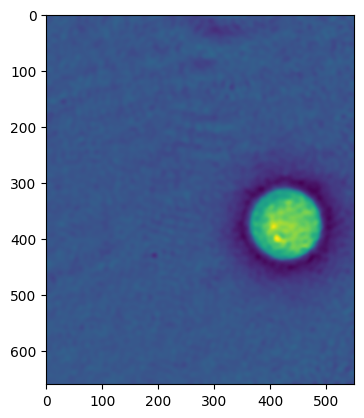

In [1]:
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import greycomatrix, greycoprops

image = io.imread('https://github.com/scikit-image/scikit-image/blob/main/skimage/data/cell.png?raw=true')
plt.imshow(image)
plt.show()

### Extract features from the image

In [2]:
# Compute gray level co-occurrence matrix (GLCM)
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
levels = 256
symmetric = True
normed = True
glcm = greycomatrix(image, distances=distances, angles=angles, levels=levels, symmetric=symmetric, normed=normed)

# Compute GLCM properties
contrast = greycoprops(glcm, 'contrast')
dissimilarity = greycoprops(glcm, 'dissimilarity')
homogeneity = greycoprops(glcm, 'homogeneity')
energy = greycoprops(glcm, 'energy')
correlation = greycoprops(glcm, 'correlation')

# Combine features into a single feature vector
features = [np.mean(contrast), np.mean(dissimilarity), np.mean(homogeneity), np.mean(energy), np.mean(correlation)]
features


/home/dinesh/.local/lib/python3.8/site-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/home/dinesh/.local/lib/python3.8/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/home/dinesh/.local/lib/python3.8/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/home/dinesh/.local/lib/python3.8/site-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/home/dinesh/.

[6.5080703909470765,
 1.2985210396648392,
 0.5600310764570614,
 0.10499143663297057,
 0.9943241238011029]

### Estimate marginal density of the features

In [3]:
import numpy as np
from scipy.stats import gaussian_kde

# Estimate the density of each feature
density = []
for i in range(len(features)):
    kde = gaussian_kde(features[i])
    density.append(kde)

# Plot the density estimates
fig, axs = plt.subplots(1, len(density), figsize=(15, 5), sharey=True)
for i in range(len(density)):
    x = np.linspace(min(features[i]), max(features[i]), 100)
    axs[i].plot(x, density[i](x))
    axs[i].set_title('Feature {}'.format(i+1))
plt.show()


ValueError: `dataset` input should have multiple elements.

In [ ]:
feature_vector